# Chatbot Test Notebook

Este notebook sirve para comprobar el funcionamiento del chatbot definido en `app/graph.py`.

In [9]:
import os
import sys
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage

# Asegurarnos de que el directorio actual está en el path para importar app
current_dir = os.getcwd()
if current_dir not in sys.path:
    sys.path.append(current_dir)

# Cargar variables de entorno
load_dotenv()

True

In [10]:
try:
    from app.graph import app_graph
    print("✅ Grafo importado correctamente.")
except Exception as e:
    print(f"❌ Error al importar el grafo: {e}")
    # Imprimimos más detalles si es posible
    import traceback
    traceback.print_exc()

✅ Grafo importado correctamente.


## Prueba de Ejecución

Vamos a enviar un mensaje de prueba para ver cómo responde el sistema completo.

In [11]:
mensaje_prueba = "Me llamo Bobby"

print(f"📩 Enviando mensaje: '{mensaje_prueba}'...")

try:
    # Configuración de memoria (hilo de conversación)
    config = {"configurable": {"thread_id": "1"}}

    # Creamos el mensaje humano
    mensaje_nuevo = HumanMessage(content=mensaje_prueba)

    # Ejecutamos el grafo con el mensaje de entrada
    resultado = app_graph.invoke({"mensajes": [mensaje_nuevo]}, config=config)
    
    print("\n✅ Ejecución completada.")
    print("="*50)
    print(f"🤖 RESPUESTA FINAL:\n{resultado.get('respuesta_final')}")
    print("="*50)
    
    print("\n🔍 Detalles del Estado Final:")
    for key, value in resultado.items():
        if key != 'respuesta_final':
            print(f"   - {key}: {value}")
            
except Exception as e:
    print(f"❌ Error durante la ejecución: {e}")
    import traceback
    traceback.print_exc()

📩 Enviando mensaje: 'Me llamo Bobby'...
Agente 1: perfilador, borra este mensaje antes de tirar la versión final!
❌ Error durante la ejecución: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************5HgA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}, 'status': 401}


Traceback (most recent call last):
  File "C:\Users\adria\AppData\Local\Temp\ipykernel_20208\707261093.py", line 13, in <module>
    resultado = app_graph.invoke({"mensajes": [mensaje_nuevo]}, config=config)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\anaconda3\envs\FastAPI\Lib\site-packages\langgraph\pregel\main.py", line 3068, in invoke
    for chunk in self.stream(
  File "c:\Users\adria\anaconda3\envs\FastAPI\Lib\site-packages\langgraph\pregel\main.py", line 2643, in stream
    for _ in runner.tick(
  File "c:\Users\adria\anaconda3\envs\FastAPI\Lib\site-packages\langgraph\pregel\_runner.py", line 167, in tick
    run_with_retry(
  File "c:\Users\adria\anaconda3\envs\FastAPI\Lib\site-packages\langgraph\pregel\_retry.py", line 42, in run_with_retry
    return task.proc.invoke(task.input, config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\anaconda3\envs\FastAPI\Lib\site-packages\langgraph\_internal\_

## Visualización del Grafo

Si tienes `graphviz` o dependencias similares instaladas, esto mostrará el diagrama del flujo.

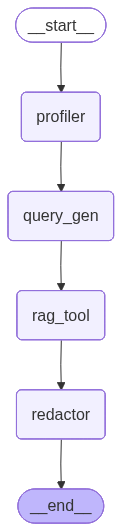

In [12]:
try:
    from IPython.display import Image, display
    display(Image(app_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"⚠️ No se pudo visualizar el grafo: {e}")